In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
batch_size = 128
epochs = 15
CLASS_NAMES = np.array([])
for i in range(10):
    CLASS_NAMES =np.append(CLASS_NAMES,chr(ord("0")+i))
for i in range(26):
    CLASS_NAMES = np.append(CLASS_NAMES,chr(ord("A")+i))

In [3]:
#training dir / validation dir
train_dir_data01 = os.path.abspath(os.getcwd())+"\\train\\data01_train\\"
val_dir_data01 = os.path.abspath(os.getcwd())+"\\dev\\data01_dev"
num_train_data01 = len(os.listdir(train_dir_data01))
num_val_data01 = len(os.listdir(val_dir_data01))
print("Train data count: " + str(num_train_data01))
print("Validation data count: " + str(num_val_data01))

Train data count: 50000
Validation data count: 10000


In [4]:
#store filename and label to a Dataframe 
import pandas as pd
data = pd.read_csv("train\\data01_train.csv")
for i in range(len(data)):
    data.iloc[i,1] = list(data.iloc[i,1])

#maybe there's an easier way to separate labels??
arr = np.zeros([6,50000],str)
for j in range(6):
    for i in range(len(data)):
        arr[j][i] = data.iloc[i,1][j]
data = data.drop(columns= ["code"]).join(pd.DataFrame(arr.transpose(),columns = ["code0","code1",'code2','code3','code4','code5']))
data

,filename,code0,code1,code2,code3,code4,code5
0,000000.jpg,Z,3,2,7,0,D
1,000001.jpg,V,M,Y,X,E,8
2,000002.jpg,J,Z,K,W,V,U
3,000003.jpg,X,9,I,2,7,H
4,000004.jpg,H,5,X,G,R,2
...,...,...,...,...,...,...,...
49995,049995.jpg,3,Y,F,I,S,E
49996,049996.jpg,4,S,U,T,F,7
49997,049997.jpg,C,Y,U,N,0,9
49998,049998.jpg,K,C,D,8,I,O


Using tf method fetch data which is faster

In [10]:
label = tf.data.Dataset.from_tensor_slices(data.iloc[:,1])

In [30]:
lbb = next(iter(label))

In [43]:
tf.expand_dims((lbb==CLASS_NAMES),0)

<tf.Tensor: shape=(1, 36), dtype=bool, numpy=
array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True]])>

In [40]:
tf.transpose((lbb==CLASS_NAMES))

<tf.Tensor: shape=(36,), dtype=bool, numpy=
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True])>

In [37]:
np.array(a).transpose()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True])

In [48]:
def parse_label(strIN):
    return tf.expand_dims(strIN==CLASS_NAMES,0)

In [49]:
lb = label.map(parse_label)

In [50]:
for i in next(iter(lb.batch(3))):
    print(i)

tf.Tensor(
[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False  True]], shape=(1, 36), dtype=bool)
tf.Tensor(
[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False  True False False False False]], shape=(1, 36), dtype=bool)
tf.Tensor(
[[False False False False False False False False False False False False
  False False False False False False False  True False False False False
  False False False False False False False False False False False False]], shape=(1, 36), dtype=bool)


In [51]:
train_label01 = label.map(parse_label)

In [52]:
def cropimage_operation(fn):
    a = tf.io.read_file((fn))
        #crop to [60,30,3]
    img = tf.image.decode_and_crop_jpeg(a,[0,0,60,30],channels=3)
    return tf.expand_dims(img,0)

In [53]:
train_dir01 = tf.data.Dataset.list_files(train_dir_data01+'*.jpg',shuffle=False)


In [54]:
train_data01 = tf.data.Dataset.zip((train_dir01.map(cropimage_operation),train_label01))

In [55]:
for img,lb in train_data01.take(3):
    print(img)
    print(lb)

tf.Tensor(
[[[[ 39 128 188]
   [ 40 129 189]
   [ 40 129 189]
   ...
   [ 56 138 198]
   [ 56 138 198]
   [ 56 138 198]]

  [[ 40 129 189]
   [ 40 129 189]
   [ 41 130 190]
   ...
   [ 57 139 199]
   [ 57 139 199]
   [ 56 138 198]]

  [[ 40 129 189]
   [ 41 130 190]
   [ 41 130 190]
   ...
   [ 57 139 199]
   [ 58 138 199]
   [ 58 138 199]]

  ...

  [[177 198 215]
   [165 188 204]
   [154 180 197]
   ...
   [159 177 197]
   [159 177 197]
   [157 176 193]]

  [[181 200 215]
   [168 190 204]
   [157 180 198]
   ...
   [157 178 199]
   [159 177 197]
   [157 175 195]]

  [[183 202 216]
   [170 192 206]
   [159 180 197]
   ...
   [157 178 199]
   [159 177 199]
   [157 175 195]]]], shape=(1, 60, 30, 3), dtype=uint8)
tf.Tensor(
[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False  True]], shape=(1, 36), dtype=bool)
tf.Tensor(
[[[[1

In [176]:
def show_batch(image_batchh, label_batchh):
  plt.figure(figsize=(14,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batchh[n])
      plt.title(CLASS_NAMES[np.where(label_batch[n])])
      plt.axis('image')

In [190]:
image_batch, label_batch = next(iter(train_data01.batch(30)))

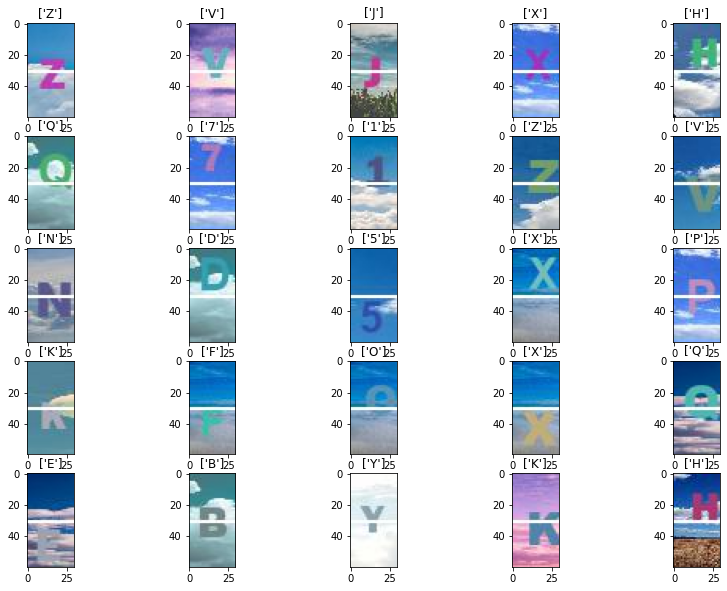

In [178]:
show_batch(image_batch,label_batch)

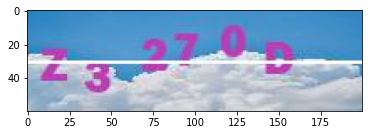

In [6]:
imgtest = plt.imread(train_dir_data01+"\\000000.jpg")
plt.imshow(imgtest)

Testing 1 class only


In [7]:
total_train = 50000

In [181]:
#for testing model

data = data.drop(columns=["code1","code2","code3","code4","code5"])

In [182]:
data

,filename,code0
0,000000.jpg,Z
1,000001.jpg,V
2,000002.jpg,J
3,000003.jpg,X
4,000004.jpg,H
...,...,...
49995,049995.jpg,3
49996,049996.jpg,4
49997,049997.jpg,C
49998,049998.jpg,K


In [183]:
IMG_HEIGHT = 60
IMG_WIDTH = 30

In [31]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [32]:
train_data_gen = train_image_generator.flow_from_dataframe(data,
                                                           directory = train_dir_data01,
                                                           x_col = "filename",
                                                           y_col = "code0",
                                                           batch_size=batch_size,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                           class_mode = "categorical",
                                                           classes=list(CLASS_NAMES))

Found 50000 validated image filenames belonging to 36 classes.


In [35]:
image_batch, label_batch = next(train_data_gen)
print(image_batch.dtype, image_batch.shape)
print(label_batch.dtype, label_batch.shape)

float32 (128, 60, 200, 3)
float32 (128, 36)


In [49]:
dataset01 = tf.data.Dataset.from_generator(
    train_data_gen,
    output_types=(tf.float32, tf.float32), 
    output_shapes=([128,60,200,3], [36])
    )

TypeError: `generator` must be callable.

In [46]:
for i in dataset01.take(1):
    print(i)

UnknownError: IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Traceback (most recent call last):

  File "C:\Users\tingw\Anaconda3\envs\myenv\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 669, in get_iterator
    return self._iterators[iterator_id]

KeyError: 0


During handling of the above exception, another exception occurred:


Traceback (most recent call last):

  File "C:\Users\tingw\Anaconda3\envs\myenv\lib\site-packages\tensorflow\python\ops\script_ops.py", line 243, in __call__
    ret = func(*args)

  File "C:\Users\tingw\Anaconda3\envs\myenv\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 309, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\tingw\Anaconda3\envs\myenv\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 785, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "C:\Users\tingw\Anaconda3\envs\myenv\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 671, in get_iterator
    iterator = iter(self._generator(*self._args.pop(iterator_id)))

  File "C:\Users\tingw\Anaconda3\envs\myenv\lib\site-packages\keras_preprocessing\image\image_data_generator.py", line 683, in flow_from_dataframe
    validate_filenames=validate_filenames

  File "C:\Users\tingw\Anaconda3\envs\myenv\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py", line 129, in __init__
    self._check_params(df, x_col, y_col, weight_col, classes)

  File "C:\Users\tingw\Anaconda3\envs\myenv\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py", line 181, in _check_params
    if not all(df[x_col].apply(lambda x: isinstance(x, str))):

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices


	 [[{{node PyFunc}}]]

In [45]:
dataset01


<FlatMapDataset shapes: ((128, 60, 200, 3), (36,)), types: (tf.float32, tf.float32)>

In [13]:
def show_batch(image_batchh, label_batchh):
  plt.figure(figsize=(14,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batchh[n])
      plt.title(CLASS_NAMES[np.where(label_batchh[n,:][:36]==1)])
      plt.axis('image')

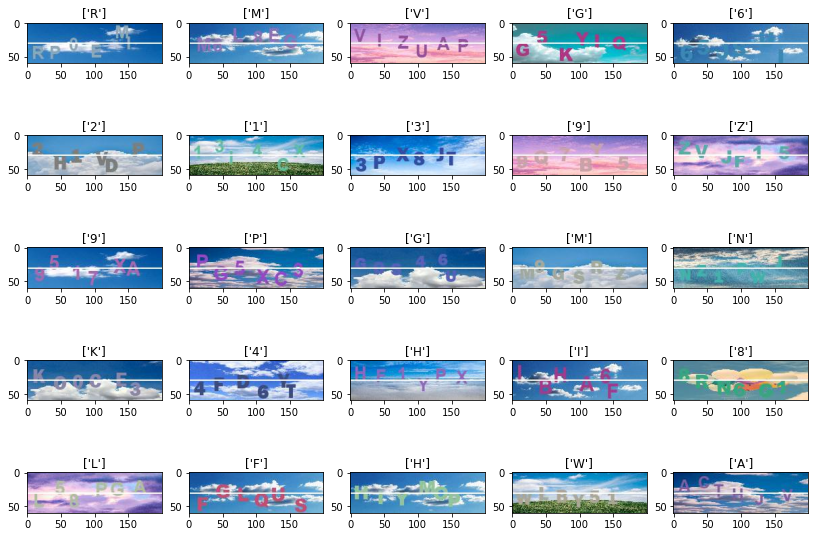

In [14]:

show_batch(image_batch, label_batch)

In [27]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(IMG_HEIGHT, IMG_WIDTH ,3), padding='same',
           activation='relu'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same',),
    Conv2D(128, (3, 3), activation='relu', padding='same',),
    Conv2D(128, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Dropout(0.1),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(2048, activation='relu'),
    Dropout(0.1),
    Dense(2048, activation='relu'),
    Dense(36,activation="softmax")
])

In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 60, 200, 32)       896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 60, 200, 32)       9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 100, 32)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 30, 100, 64)       18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 30, 100, 64)       36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 50, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 15, 50, 128)      

In [30]:
history = model.fit(
    train_data_gen,
    batch_size=batch_size,
    steps_per_epoch=total_train // batch_size, 
    epochs=epochs,
    verbose=1
)

Epoch 1/15
390/390 [==============================] - 110s 283ms/step - loss: 3.5839 - accuracy: 0.0281
Epoch 2/15
390/390 [==============================] - 110s 282ms/step - loss: 3.5836 - accuracy: 0.0285
Epoch 3/15
390/390 [==============================] - 110s 282ms/step - loss: 3.5835 - accuracy: 0.0275
Epoch 4/15
390/390 [==============================] - 110s 282ms/step - loss: 3.5835 - accuracy: 0.0287
Epoch 5/15
390/390 [==============================] - 110s 282ms/step - loss: 3.5834 - accuracy: 0.0274
Epoch 6/15
390/390 [==============================] - 107s 276ms/step - loss: 3.5836 - accuracy: 0.0281
Epoch 7/15
390/390 [==============================] - 106s 271ms/step - loss: 3.5834 - accuracy: 0.0284
Epoch 8/15
390/390 [==============================] - 106s 271ms/step - loss: 3.5836 - accuracy: 0.0281
Epoch 9/15
390/390 [==============================] - 106s 271ms/step - loss: 3.5834 - accuracy: 0.0290
Epoch 10/15
390/390 [==============================] - 106s 272m

In [101]:
def predict_sigle_img(imgdir):
    imgtest2 = plt.imread(imgdir)
    imgtest2 = np.expand_dims(imgtest2, axis=0)
    result = model(imgtest2)
    PredChr = CLASS_NAMES[
        np.where(result.numpy()[0] == result.numpy()[0].max())[0][0]
    ]
    print("Predict character: "+ PredChr)
    return model(imgtest2)

In [105]:
result = predict_sigle_img(train_dir_data01+"\\031000.jpg")

Predict character: 4


In [106]:
result

<tf.Tensor: shape=(1, 36), dtype=float32, numpy=
array([[0.02831939, 0.02924999, 0.02883995, 0.02910619, 0.02980204,
        0.02664193, 0.02764047, 0.02927888, 0.02733275, 0.02858233,
        0.0274811 , 0.02702519, 0.02741827, 0.02738214, 0.02740136,
        0.02592674, 0.02661657, 0.025634  , 0.02928273, 0.02721309,
        0.02904084, 0.02901541, 0.0288444 , 0.02775817, 0.02841185,
        0.02575532, 0.02764374, 0.02795218, 0.02789387, 0.02757317,
        0.02866028, 0.02675975, 0.02686238, 0.02736555, 0.02650953,
        0.02777836]], dtype=float32)>

 # old

In [ ]:
for image, label in train_data01:
    image = cropimage_operation(image)
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())
def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  ds = ds.shuffle(buffer_size=shuffle_buffer_size)

  # Repeat forever
  ds = ds.repeat()

  ds = ds.map(lambda x: cropimage(x[0]))

  
  return ds
train_ds = prepare_for_training(train_data01)

image_batch, label_batch = next(iter(train_ds))